In [1]:
import pandas as pd

In [2]:
import plotly
# To store data
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes
from collections import Counter

# To investigate distributions
from scipy.stats import norm, skew, probplot

# To build models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#from lightgbm import LGBMClassifier

# To measure time
from time import time

In [3]:
col_names = ['Ph1', 'Ph2', 'Ir1', 'Fo1', 'Fo2', 'Di3', 'Di4', 'Ph3', 'Ph4', 'Ph5', 'Ph6', 'Co1', 'Co2', 'Co3', 'So1', 'So2', 'Di1', 'Di2', 'Te1', 'Fo3', 'Resident1', 'Resident2']
house = pd.read_csv("house1.csv")

In [4]:
house.head()

,Unnamed: 0,Ph1,Ph2,Ir1,Fo1,Fo2,Di3,Di4,Ph3,Ph4,...,Co3,So1,So2,Di1,Di2,Te1,Fo3,Resident1,Resident2,day
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0


In [5]:
house = house.drop('Unnamed: 0',1)
house.describe(include='all').round(3)

,Ph1,Ph2,Ir1,Fo1,Fo2,Di3,Di4,Ph3,Ph4,Ph5,...,Co3,So1,So2,Di1,Di2,Te1,Fo3,Resident1,Resident2,day
count,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,...,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000,2592000.000
mean,0.003,0.001,0.003,0.415,0.153,0.112,0.093,0.006,0.001,0.001,...,0.006,0.006,0.030,0.003,0.028,0.053,0.197,11.211,7.128,3.833
std,0.058,0.026,0.058,0.493,0.360,0.315,0.290,0.076,0.024,0.027,...,0.075,0.078,0.172,0.056,0.165,0.224,0.398,5.698,6.140,2.034
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,2.000,2.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,2.000,4.000
75%,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14.000,11.000,6.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,27.000,27.000,7.000


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592000 entries, 0 to 2591999
Data columns (total 23 columns):
Ph1          int64
Ph2          int64
Ir1          int64
Fo1          int64
Fo2          int64
Di3          int64
Di4          int64
Ph3          int64
Ph4          int64
Ph5          int64
Ph6          int64
Co1          int64
Co2          int64
Co3          int64
So1          int64
So2          int64
Di1          int64
Di2          int64
Te1          int64
Fo3          int64
Resident1    int64
Resident2    int64
day          float64
dtypes: float64(1), int64(22)
memory usage: 454.8 MB


In [7]:
import pandas as pd
date = pd.to_datetime("1th of January, 2018")
date

Timestamp('2018-01-01 00:00:00')

In [8]:
date1 = np.datetime64('2018-01-01 00:00:00')
date1

numpy.datetime64('2018-01-01T00:00:00')

In [9]:
temp1 = date1 + np.arange(2592000)
temp1

array(['2018-01-01T00:00:00', '2018-01-01T00:00:01', '2018-01-01T00:00:02',
       ..., '2018-01-30T23:59:57', '2018-01-30T23:59:58',
       '2018-01-30T23:59:59'], dtype='datetime64[s]')

In [10]:
temp = date + pd.to_timedelta(np.arange(2592000), 's')
temp

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-30 23:59:50', '2018-01-30 23:59:51',
               '2018-01-30 23:59:52', '2018-01-30 23:59:53',
               '2018-01-30 23:59:54', '2018-01-30 23:59:55',
               '2018-01-30 23:59:56', '2018-01-30 23:59:57',
               '2018-01-30 23:59:58', '2018-01-30 23:59:59'],
              dtype='datetime64[ns]', length=2592000, freq=None)

In [11]:
house['Time'] = temp1
house.tail()

,Ph1,Ph2,Ir1,Fo1,Fo2,Di3,Di4,Ph3,Ph4,Ph5,...,So1,So2,Di1,Di2,Te1,Fo3,Resident1,Resident2,day,Time
2591995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,12,2,2.0,2018-01-30 23:59:55
2591996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,12,2,2.0,2018-01-30 23:59:56
2591997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,12,2,2.0,2018-01-30 23:59:57
2591998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,12,2,2.0,2018-01-30 23:59:58
2591999,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,12,2,2.0,2018-01-30 23:59:59


In [12]:
house_new = house.set_index('Time')

In [13]:
house_new.head()

,Ph1,Ph2,Ir1,Fo1,Fo2,Di3,Di4,Ph3,Ph4,Ph5,...,Co3,So1,So2,Di1,Di2,Te1,Fo3,Resident1,Resident2,day
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
2018-01-01 00:00:01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
2018-01-01 00:00:02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
2018-01-01 00:00:03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0
2018-01-01 00:00:04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,1.0


In [14]:
%matplotlib inline
from matplotlib.pylab import plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy



In [24]:
day= pd.read_csv('HAR/DAY_4.csv' )

In [25]:
day1_fo1 = day['Fo1'].sum()
day1_fo1

35570

In [26]:
df22 = pd.DataFrame(columns=["Freq"], data=[[day1_fo1]])
day_fo1 = day_fo1.append(df22, ignore_index=True)
day_fo1

,Freq
0,46575
1,29729
2,35570


In [20]:
day_fo1 = pd.DataFrame(columns=["Freq"], data=[[day1_fo1]])
day_fo1

,Freq
0,46575


In [ ]:
xticks = range(1, 30)


In [ ]:
plt.plot(day_fo1)
#plt.set_xticks(xticks)

In [ ]:
plt.plot(day_fo2)

In [ ]:
r = day_fo1.rolling(window = 3)
r

In [ ]:
day_fo1['Freq'].plot(color = 'gray')
r.mean()['Freq'].plot(color = 'red')

In [ ]:
r2 = day_fo2.rolling(window = 2)

In [ ]:
day_fo2['Freq'].plot(color = 'gray')
r2.mean()['Freq'].plot(color = 'red')

In [ ]:
day_fo1['Freq'].plot(color = 'gray')
r.quantile(0.3)['Freq'].plot(color = 'red')

In [ ]:
from statsmodels.tsa import stattools

In [ ]:
acf_result = stattools.acf(day_fo1)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(day_fo1)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(day_fo1)),linestyle='--')

In [ ]:
acf_result2 = stattools.acf(day_fo2)
plt.plot(acf_result2)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(day_fo2)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(day_fo2)),linestyle='--')

In [ ]:
max(house.Time)

In [ ]:
dfo1 = house.iloc[:house.index.get_loc(2591999)+1,:24].copy()

In [ ]:
df_temp = house.iloc[0:3600,3].copy()
sum = df_temp.sum()
hour_fo1 = pd.DataFrame(columns=["Freq"], data=[[sum]])

j = 3600

for i in range(0, 719):
    df_temp = house.iloc[j:j+3600,3].copy()
    j = j+ 3600
    sum = df_temp.sum()
    df22 = pd.DataFrame(columns=["Freq"], data=[[sum]])
    hour_fo1 = hour_fo1.append(df22, ignore_index=True)

In [ ]:
plt.plot(hour_fo1)
plt.gca().set_ylim(-500, 4000)

In [ ]:
rh1 = hour_fo1.rolling(window = 20)
rh1
#hour_fo1['Freq'].plot(color = 'gray')
rh1.mean()['Freq'].plot(color = 'red')

In [ ]:
acf_result = stattools.acf(hour_fo1)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(hour_fo1)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(hour_fo1)),linestyle='--',color='red')

In [ ]:
df_temp = house.iloc[0:3600,4].copy()
sum2 = df_temp.sum()
hour_fo2 = pd.DataFrame(columns=["Freq"], data=[[sum2]])

j = 3600

for i in range(0, 719):
    df_temp2 = house.iloc[j:j+3600,4].copy()
    j = j+ 3600
    sum2 = df_temp2.sum()
    df22 = pd.DataFrame(columns=["Freq"], data=[[sum2]])
    hour_fo2 = hour_fo2.append(df22, ignore_index=True)

In [ ]:
plt.plot(hour_fo2)

In [ ]:
rh2 = hour_fo2.rolling(window = 20)
rh2
hour_fo2['Freq'].plot(color = 'gray')
rh2.mean()['Freq'].plot(color = 'red')

In [ ]:
acf_result = stattools.acf(hour_fo1)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(hour_fo1)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(hour_fo1)),linestyle='--',color='red')

In [14]:
dfo1_new = dfo1.drop(['Ph1','Ph2','Ir1','Fo1','Di3','Di4','Ph3','Ph4','Ph5','Ph6','Co1','Co2','Co3','So1','So2','Di1','Di2','Te1','Fo3'],axis=1)

In [15]:
dfo1_new = dfo1.drop(['Ph1','Ph2','Ir1','Fo1','Di3','Di4','Ph3','Ph4','Ph5','Ph6','Co1','Co2','Co3','So1','So2','Di1','Di2','Te1','Fo3','Resident1','Resident2','day'],axis=1)

In [16]:
dfo1_new

,Fo2,Time
0,0,2018-01-01 00:00:00
1,0,2018-01-01 00:00:01
2,0,2018-01-01 00:00:02
3,0,2018-01-01 00:00:03
4,0,2018-01-01 00:00:04
5,0,2018-01-01 00:00:05
6,0,2018-01-01 00:00:06
7,0,2018-01-01 00:00:07
8,0,2018-01-01 00:00:08
9,0,2018-01-01 00:00:09


In [17]:
dfo1_new = dfo1_new.set_index('Time')
dfo1_new

,Fo2
Time,
2018-01-01 00:00:00,0
2018-01-01 00:00:01,0
2018-01-01 00:00:02,0
2018-01-01 00:00:03,0
2018-01-01 00:00:04,0
2018-01-01 00:00:05,0
2018-01-01 00:00:06,0
2018-01-01 00:00:07,0
2018-01-01 00:00:08,0


In [98]:
new = house[['Fo2','Time']].copy()

In [99]:
new.groupby(['Time']).sum()

,Fo2
Time,
2018-01-01 00:00:00,0
2018-01-01 00:00:01,0
2018-01-01 00:00:02,0
2018-01-01 00:00:03,0
2018-01-01 00:00:04,0
2018-01-01 00:00:05,0
2018-01-01 00:00:06,0
2018-01-01 00:00:07,0
2018-01-01 00:00:08,0


In [20]:
ts = pd.Series(list(range(len(house))), index = house['Time'])

In [55]:
ts.head()

Time
2018-01-01 00:00:00    0
2018-01-01 00:00:01    1
2018-01-01 00:00:02    2
2018-01-01 00:00:03    3
2018-01-01 00:00:04    4
dtype: int64

In [60]:
converted = ts.asfreq('1h',method = None)

In [61]:
converted.head()

Time
2018-01-01 00:00:00        0
2018-01-01 01:00:00     3600
2018-01-01 02:00:00     7200
2018-01-01 03:00:00    10800
2018-01-01 04:00:00    14400
Freq: H, dtype: int64

In [62]:
ts.resample('2H',label='right').mean()[:10]

Time
2018-01-01 02:00:00     3599.5
2018-01-01 04:00:00    10799.5
2018-01-01 06:00:00    17999.5
2018-01-01 08:00:00    25199.5
2018-01-01 10:00:00    32399.5
2018-01-01 12:00:00    39599.5
2018-01-01 14:00:00    46799.5
2018-01-01 16:00:00    53999.5
2018-01-01 18:00:00    61199.5
2018-01-01 20:00:00    68399.5
Freq: 2H, dtype: float64

In [24]:
y = house[['Resident1', 'Resident2']].copy()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592000 entries, 0 to 2591999
Data columns (total 2 columns):
Resident1    int64
Resident2    int64
dtypes: int64(2)
memory usage: 39.6 MB


In [26]:
X = house.copy()

In [28]:
X.drop(['Resident1', 'Resident2'], axis=1, inplace=True)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [41]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

In [67]:
X_std[:,4]


array([-0.42514318, -0.42514318, -0.42514318, ...,  2.35214876,
        2.35214876,  2.35214876])

In [51]:
X_std.std()

1.0000000000000022

In [57]:
%matplotlib inline

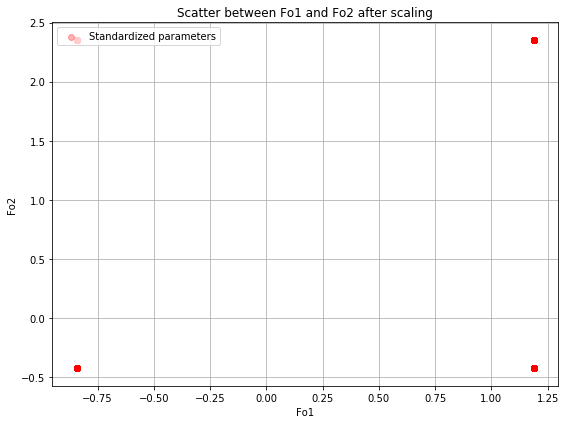

In [66]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    #plt.scatter(X_std[:,3], X_std[:,4],
     #       color='green', label='input scale', alpha=0.5)

    plt.scatter(X_std[:,3], X_std[:,4], color='red',
            label='Standardized parameters', alpha=0.3)

    #plt.scatter(df_minmax[:,0], df_minmax[:,1],
            #color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Scatter between Fo1 and Fo2 after scaling')
    plt.xlabel('Fo1')
    plt.ylabel('Fo2')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

    
plot()
plt.show()

KeyError: 'Class label'

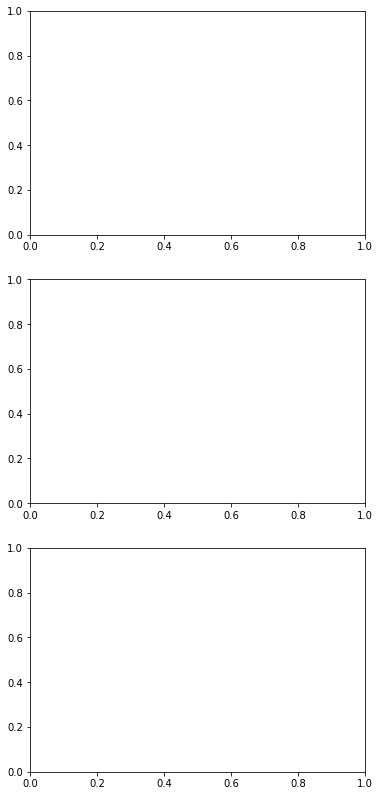

In [49]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (X.values, X_std),
               ('Input scale',
                'Standardized values')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[X['Class label'].values == i, 0],
                  d[X['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Fo1')
    ax[a].set_ylabel('Fo2')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

In [71]:
res1 = house.iloc[:,[20,22]]
res2 = house.iloc[:,[21,22]]
pieData = house.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22]]

In [120]:
res1_day = res1.loc[res1['day'] == 7.0,'Resident1']
res2_day = res2.loc[res1['day'] == 7.0,'Resident2']

In [121]:
import numpy as np
a = np.array(res2_day)
print("Original array:")
print(a)
unique_elements, counts_elements = np.unique(a, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Original array:
[2 2 2 ..., 2 2 2]
Frequency of unique values of the said array:
[[     1      2      7      8      9     10     11     12     14     15
      16     17     18     19     20     21     22     25     27]
 [  7219 174411   3919   3026   2007   3744  79989  27794   4226   7277
    3248  11435   2400    503   2803   1642   5219    500   4238]]


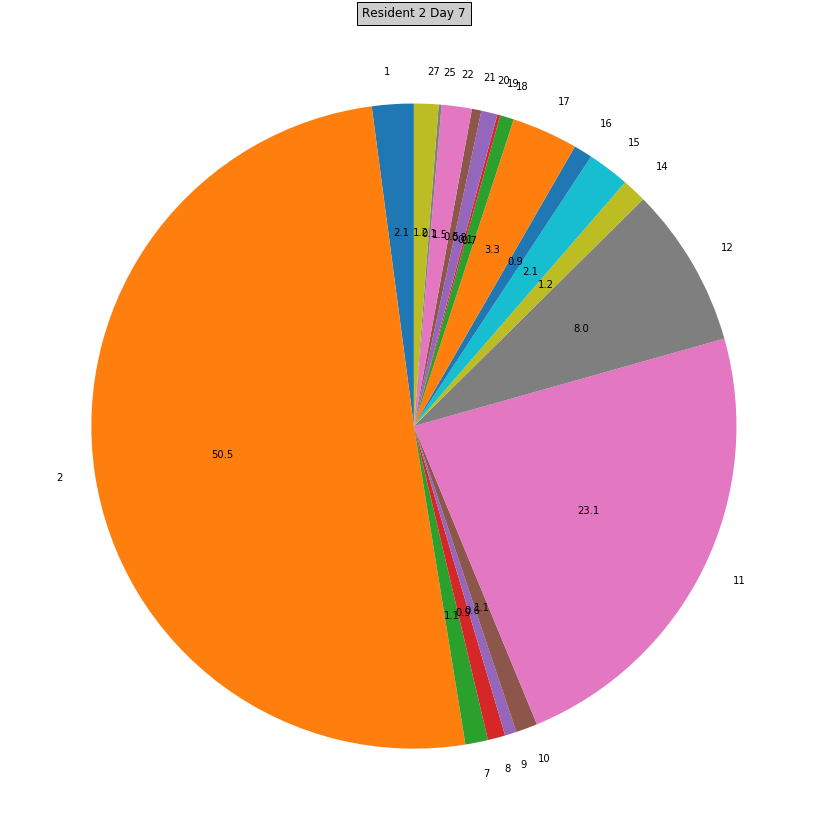

In [122]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(14,14))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = np.asarray(unique_elements)
values = np.asarray(counts_elements)
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = np.asarray(counts_elements)

pie(fracs, labels=labels,autopct='%1.1f', startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Resident 2 Day 7', bbox={'facecolor':'0.8', 'pad':5})
plt.savefig("r2d7.png")
show()

In [60]:
ph1 = pieData.loc[pieData['day'] == 1.0,'Ph1']
1_count = np.count_nonzero(co2)
ph2 = pieData.loc[pieData['day'] == 1.0,'Ph2']
2_count = np.count_nonzero(co2)
ir1 = pieData.loc[pieData['day'] == 1.0,'Ir1']
3_count = np.count_nonzero(co2)
fo1 = pieData.loc[pieData['day'] == 1.0,'Fo1']
4_count = np.count_nonzero(co2)
fo2 = pieData.loc[pieData['day'] == 1.0,'Fo2']
5_count = np.count_nonzero(co2)
di3 = pieData.loc[pieData['day'] == 1.0,'Di3']
6_count = np.count_nonzero(co2)
di4 = pieData.loc[pieData['day'] == 1.0,'Di4']
7_count = np.count_nonzero(co2)
ph3 = pieData.loc[pieData['day'] == 1.0,'Ph3']
8_count = np.count_nonzero(co2)
ph4 = pieData.loc[pieData['day'] == 1.0,'Ph4']
9_count = np.count_nonzero(co2)
ph5 = pieData.loc[pieData['day'] == 1.0,'Ph5']
x_count = np.count_nonzero(co2)
ph6 = pieData.loc[pieData['day'] == 1.0,'Ph6']
x_count = np.count_nonzero(co2)
co1 = pieData.loc[pieData['day'] == 1.0,'Co1']
x_count = np.count_nonzero(co2)
co2 = pieData.loc[pieData['day'] == 1.0,'Co2']
x_count = np.count_nonzero(co2)
co3 = pieData.loc[pieData['day'] == 1.0,'Co3']
x_count = np.count_nonzero(co2)
so1 = pieData.loc[pieData['day'] == 1.0,'So1']
x_count = np.count_nonzero(co2)
so2 = pieData.loc[pieData['day'] == 1.0,'So2']
x_count = np.count_nonzero(co2)
di1 = pieData.loc[pieData['day'] == 1.0,'Di1']
x_count = np.count_nonzero(co2)
di2 = pieData.loc[pieData['day'] == 1.0,'Di2']
x_count = np.count_nonzero(co2)
te1 = pieData.loc[pieData['day'] == 1.0,'Te1']
x_count = np.count_nonzero(co2)
fo3 = pieData.loc[pieData['day'] == 1.0,'Fo3']
x_count = np.count_nonzero(co2)

SyntaxError: invalid token (<ipython-input-60-3ec9ef8a25ba>, line 2)

In [52]:
x_count = np.count_nonzero(co2)
x_count

19253

In [ ]:
#Histograms on their counts
%matplotlib inline

import matplotlib.pyplot as plot
house.hist(bins=50,figsize=(20,15))
#save_fig("attribute_hou_plots")
plot.show()

In [ ]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(house[['Resident1','Resident2','Ph1']],hue="Ph1", palette='tab20',size=6)
    g.set(xticklabels=[]);

In [8]:
import plotly

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

house_copy = house.copy()

label1 = house_copy.pop('Resident1')
label2 = house_copy.pop('Resident2')


In [9]:

#For Resident1
label_counts = label2.value_counts()

n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Resident1 Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

In [10]:
#For Resident2
label_counts = label2.value_counts()

n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Resident2 Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

In [ ]:
tsne_data = house.copy()

scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)


tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(3,2))


### Plot Activities
# Get colors
n = label2.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label2==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label2=group)

axarr[0].set_title('TSNE Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('nipy_spectral')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label2=group)

axarr[1].set_title('TSNE Subject Visualisation')
plt.show()